## Data Description
Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased  with the introduction of a cut -resistant, longer resistant, longer -lasting golf ball. 
1. Formulate and present the rationale for a hypothesis test that par could use to compare driving distances of the current and new golf balls. 
2. Analyse the data to provide hypothesis testing conclusion. What is p Analyse of your test? What is recommendation for Par Inc.? 
3. Provide descriptive statistical summaries of the data for each model.

## Setps to follow
• Import pandas, numpy , ttest_ind , levene , shapiro , iqr , matplotlib.pyplot
• Get the data
• Check for the Descriptive Statistics.
• Check if shapiro and levene tests work fine for the data. 
• Calculate Pooled Standard Deviation
• Calculate Sample power

## Import Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from scipy.stats import ttest_ind
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats import iqr

## Read the Data

In [2]:
# read the data
data = pd.read_excel("SM4-Golf.xls")

In [3]:
data.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


## Some Descriptive Statistics

In [14]:
data.info()
#From the output we can see that there are 40 non null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


In [30]:
# Lets check how data looks, Descriptive statistics, count mean std
data.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


## Check Distributions and Five-Number Summary

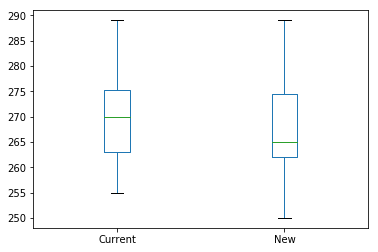

In [16]:
# Lets plot boxplot to check Five-Number Summary, & to identify if there are any outliers
data.boxplot(grid=False)

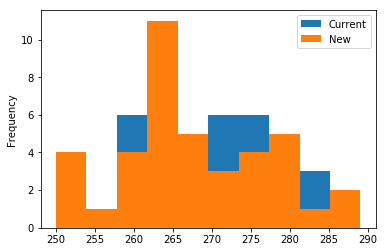

In [25]:
data.plot(kind='hist')

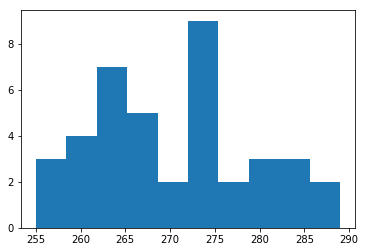

In [48]:
plt.hist(data['Current']);

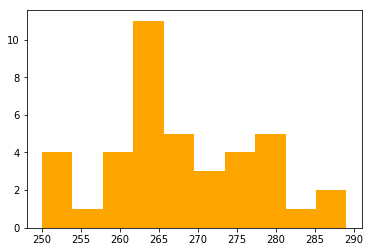

In [58]:
plt.hist(data['New'],color='orange');

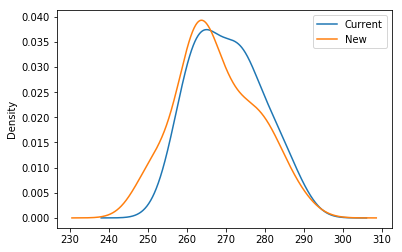

In [26]:
data.plot(kind='kde')
#formt he plot we can see that sample data is distributed normally, though there is slight skewness

## Check if shapiro and levene tests work fine for the data

##### We need to check Normality and Variance
- Shapiro -> is used to test the Normality, it tests/checks if the sample data is distributed normally or drawn from normal distribution population data. Normality criterion holds true when p > a ( where a is set to 0.05)
- levene ->  is used to test the Variance, it tests/check if the sampel data comes from population with same variance. Variance criterion holds true when p > a ( where a is set to 0.05) 

In [35]:
# Shapiro Normality test for Current golf-Ball
# returns w ,p
w,p = shapiro(data['Current'])
print(w,p)

0.9707046747207642 0.378787100315094


In [36]:
# Assuming a as 0.05 (standard)
if(p>0.05):
    print("Normality criterion holds true for 'Current' sample data")
else:
    print("Normality criterion  is false for 'Current' sample data")


Normality criterion holds true for 'Current' sample data


In [37]:
# Shapiro Normality test for New golf-Ball
# returns w ,p
w1,p1 = shapiro(data['New'])
print(w1,p1)

0.9678263664245605 0.3064655363559723


In [38]:
# Assuming a as 0.05 (standard)
if(p1>0.05):
    print("Normality criterion holds true for 'New' sample data")
else:
    print("Normality criterion  is false for 'New' sample data")


Normality criterion holds true for 'New' sample data


In [40]:
## now Lets apply levene tests to check the Variance
# returns w ,p
w,p = levene(data['Current'],data['New'])
print(w,p)

0.2553238291765741 0.6147759523331309


In [41]:
# Assuming a as 0.05 (standard)
if(p>0.05):
    print("Variance criterion holds true for sample data")
else:
    print("Variance criterion holds fase for sample data")


Variance criterion holds true for sample data


## Calculate Pooled Standard Deviation

## Spooled=sqrt( ((n1−1)s1^2 + (n2−1)s2^2)/(n1+n2−2) )

n1 = size of group1
n2 = size of group 2
s1 = standard deviation of group 1
s2 = standard deviation of group 2

In [79]:
CurrentStd = np.std(data['Current'])
NewStd = np.std(data['New'])
n1 =n2 = data['Current'].count()
print(CurrentStd, NewStd)

df1 = n1-1;
df2 = df1;

print("degree of Freedom ",df1)

8.642880017679293 9.772410142846033
degree of Freedom  39


In [92]:
spooled = np.sqrt( ( df1 * np.square(CurrentStd) + df2 * np.square(NewStd) )/ (n1 + n2 -2 ) )

print("Pooled standard deviation {}".format(spooled))

Pooled standard deviation 9.224949186851925


## Calculate Sample power

In [104]:
delta = (np.mean(data['Current']) - np.mean(data['New']))/spooled
print(delta)

0.3008146650775173


In [94]:
from statsmodels.stats.power import ttest_power

In [107]:
print(ttest_power(delta,nobs=40,alpha=0.05,alternative="two-sided"))

0.45851335474442073


####Above statement means that there is 45% chances to reject the Null Hypotheis (Null hypothesis being false)

## Calculate Standard Error

In [128]:
SDerror_current = np.std(data['Current'])/np.sqrt(n1)
print(SDerror_current)

SDerror_new = np.std(data['New'])/np.sqrt(n1)
print(SDerror_new)

1.3665593199711457
1.5451537140362444


# Now lets perfrom Hypothesis Testing

## 1 ) State Null and Alternate Hypothesis 
- Null Hypotheis , Par’s market share could be same with the introduction of a cut -resistant  or H0:μ1=μ2
- Alternate Hypotheis,  Par’s market share could be increased with the introduction of a cut -resistant or H1:μ1!=μ2

## 2) Set Alpha
α = 0.05  (considering as it is standard)

## 3) State Decision rule

In [122]:
DegreeOfFreedom = (n1-1)+(n2-1)
print(DegreeOfFreedom)

78


In [123]:
# Calculate the critical value for DegreeOfFreedom=78 and alpha = 0.05
#http://www.ttable.org/student-t-value-calculator.html
print("Critical Value is 1.9908 as per the T-table")

Critical Value is 1.9908 as per the T-table


### So we expect  t-value to be between  -1.9908 to +1.9908 , otherwise we reject the null hypothesis

## 4) Calculate a test statistic

Let us use T-Test (as Normality & Variance criteria is true per shapiro & levene test)

In [124]:
ttest_ind(data['Current'], data['New'])

Ttest_indResult(statistic=1.3283615935245678, pvalue=0.18793228491854663)

In [125]:
t, p = ttest_ind(data['Current'], data['New'])
print(t,p)

1.3283615935245678 0.18793228491854663


### p-value is 0.187 
Reject Null Hypothesis if p-value is <0.05

Do not reject Null Hypothesis if p-value is >0.05

## Conclusion

- so it was decided from #3 that we accept the null hupothesis if t-value falls between -1.9908 to +1.9908, and as calucated in #4 the t-value is 1.32 which is less than 1.9908
- Also note that p-value ( 0.188 ) is greather that alpha ( 0.05 ) so we do not reject Null Hypothesis

## so we do not reject the null Hypothesis
## So recommendation for Par Inc is not to release the new cut-resistant golf-balls as it may not result to higher market share

# Summary

- From descriptive statistics we saw that the Mean,Standard Deviation, max etc are mostly close for both Current and New values 
- Then we used Shapiro and levene tests to check Normality and Variance
> -  With Shapiro test we found p-value as 0.378 for Current golf, Normality criteria holds true if p-value is > 0.05 (level of significance)
> - With Shapiro test we found p-value as 0.306 for New golf, Normality criteria holds true if p-value is > 0.05 (level of significance)
> - With Levene test we found p-value as 0.614 , for Variance criteria holds true if p-value is > 0.05 (level of significance)
- Then calculated spooled standard deviation and sample power
> - spooled standard deviation calculated as 9.224
> - sample power calcuated to ( delta/spooled standard deviation) -> 0.458
> - Above statement means that there is 45% chance to reject the Null Hypotheis (Null hypothesis being false)
- Then performed hypothesis testinng using idenpendent t-test
> - From the testing we found that p-value was > 0.05 and t-value was falling within Confidence Interval(Acceptance Region)
> - form the result we concluded that there was NO strong evidence to reject the null hypothesis
- ## so recommendation to Par Inc is that not to release the new cut-resistant golf-balls as it may not result to higher market share